In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
import src.util as util
from src.linear_model import LinearModel

In [127]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        m, n = x.shape

        # initialize theta as 0 vector
        if self.theta is None:
            self.theta = np.zeros(n)

        while True:
            g = sigmoid(x @ self.theta)                          # (m,)
            gradient = (x.T @ (g - y)) * (1 / m)                 # (n,)
            g = g.reshape((-1, 1))
            hessian = x.T @ (g * (1 - g) * x) * (1 / m)          # n * n

            theta = self.theta - np.linalg.inv(hessian) @ gradient

            if np.linalg.norm(theta - self.theta, ord = 1) < self.eps:
                self.theta = theta
                break

            self.theta = theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        y = x @ self.theta
        y = np.where(y < 0, 0, 1)
        return y
        # *** END CODE HERE ***

In [128]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m, n = x.shape
        phi = np.sum(y) / m
        mu_0 = np.dot(x.T, y - 1) / np.sum(y - 1)
        mu_1 = np.dot(x.T, y) / np.sum(y)

        y = np.reshape(y, (-1, 1))
        mu_0 = np.reshape(mu_0, (-1, 1))
        mu_1 = np.reshape(mu_1,(-1, 1))
        mu = np.dot(mu_0, (1 - y).T) + np.dot(mu_1, y.T)
        sigma = np.dot(x.T - mu, (x.T - mu).T) / m

        sigma_inv = np.linalg.inv(sigma)
        self.theta = np.dot(sigma_inv, mu_1 - mu_0)
        theta_0 = 0.5 * (mu_0.T @ sigma_inv @ mu_0 - mu_1.T @ sigma_inv @ mu_1) - np.log((1 - phi) / phi)
        self.theta = np.insert(self.theta, 0, theta_0)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return np.dot(util.add_intercept(x), self.theta) >= 0
        # *** END CODE HERE

In [155]:
ds1_train_path = 'data/ds1_train.csv'
ds2_train_path = 'data/ds2_train.csv'

x_train_ds1, y_train_ds1 = util.load_dataset(ds1_train_path, add_intercept=True)
x_train_ds2, y_train_ds2 = util.load_dataset(ds2_train_path, add_intercept=True)

In [156]:
clf = LogisticRegression()
clf.fit(x_train_ds1, y_train_ds1)

x_train_ds1, y_train_ds1 = util.load_dataset(ds1_train_path)
clf_gda = GDA()
clf_gda.fit(x_train_ds1, y_train_ds1)

In [157]:
def plot(x, y, theta_1, theta_2, save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta_1[0] / theta_1[2] * correction + theta_1[1] / theta_1[2] * x1)
    x3 = -(theta_2[0] / theta_2[2] * correction + theta_2[1] / theta_2[2] * x1)
    
    plt.plot(x1, x2, c='red', linewidth=2, label='log_reg')
    plt.plot(x1, x3, c='black', linewidth=2, label='gda')
    
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    if save_path is not None:
        plt.savefig(save_path)

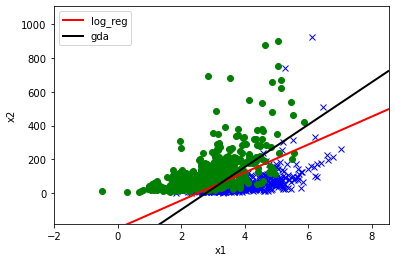

In [158]:
plot(x_train_ds1, y_train_ds1, clf.theta, clf_gda.theta, save_path='p1_f_d1_train')

In [159]:
clf = LogisticRegression()
clf.fit(x_train_ds2, y_train_ds2)

x_train_ds2, y_train_ds2 = util.load_dataset(ds2_train_path)
clf_gda = GDA()
clf_gda.fit(x_train_ds2, y_train_ds2)

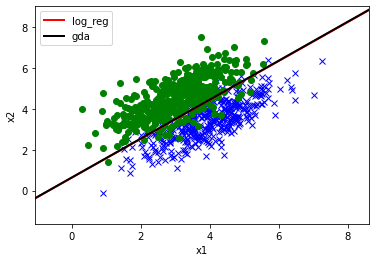

In [160]:
plot(x_train_ds2, y_train_ds2, clf.theta, clf_gda.theta, save_path='p1_g_d2_train')

In [161]:
ds1_valid_path = 'data/ds1_valid.csv'
ds2_valid_path = 'data/ds2_valid.csv'

x_valid_ds1, y_valid_ds1 = util.load_dataset(ds1_valid_path, add_intercept=True)
x_valid_ds2, y_valid_ds2 = util.load_dataset(ds2_valid_path, add_intercept=True)

In [162]:
clf = LogisticRegression()
clf.fit(x_valid_ds1, y_valid_ds1)

x_valid_ds1, y_valid_ds1 = util.load_dataset(ds1_valid_path)
clf_gda = GDA()
clf_gda.fit(x_valid_ds1, y_valid_ds1)

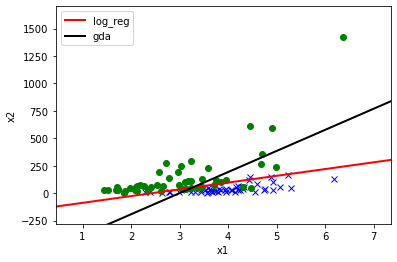

In [163]:
plot(x_valid_ds1, y_valid_ds1, clf.theta, clf_gda.theta, save_path='p1_f_d1_valid')

In [164]:
clf = LogisticRegression()
clf.fit(x_valid_ds2, y_valid_ds2)

x_valid_ds2, y_valid_ds2 = util.load_dataset(ds2_valid_path)
clf_gda = GDA()
clf_gda.fit(x_valid_ds2, y_valid_ds2)

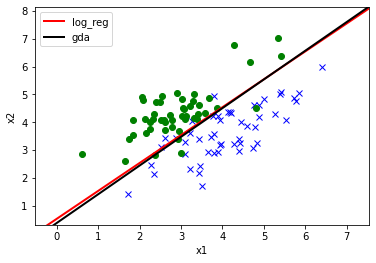

In [165]:
plot(x_valid_ds2, y_valid_ds2, clf.theta, clf_gda.theta, save_path='p1_g_valid')